In [1]:
import math
from matplotlib import pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#necessita do pydot pip install pydot
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model


In [2]:
# Load dataset
filename = ("https://telescopeinstorage.blob.core.windows.net/datasets/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names,engine='python')


<ipython-input-2-9d6f7cbc2aaa>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv(filename, delim_whitespace=True, names=names,engine='python')


In [3]:
#- CRIM     per capita crime rate by town
#- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS    proportion of non-retail business acres per town
#- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX      nitric oxides concentration (parts per 10 million)
#- RM       average number of rooms per dwelling -  é o número médio de cômodos entre os imóveis na vizinhança.
#- AGE      proportion of owner-occupied units built prior to 1940
#- DIS      weighted distances to five Boston employment centres
#- RAD      index of accessibility to radial highways
#- TAX      full-value property-tax rate per $10,000
#- PTRATIO  pupil-teacher ratio by town - é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.
#- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#- LSTAT    % lower status of the population - é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
#- MEDV     Median value of owner-occupied homes in $1000's

dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


<Axes: >

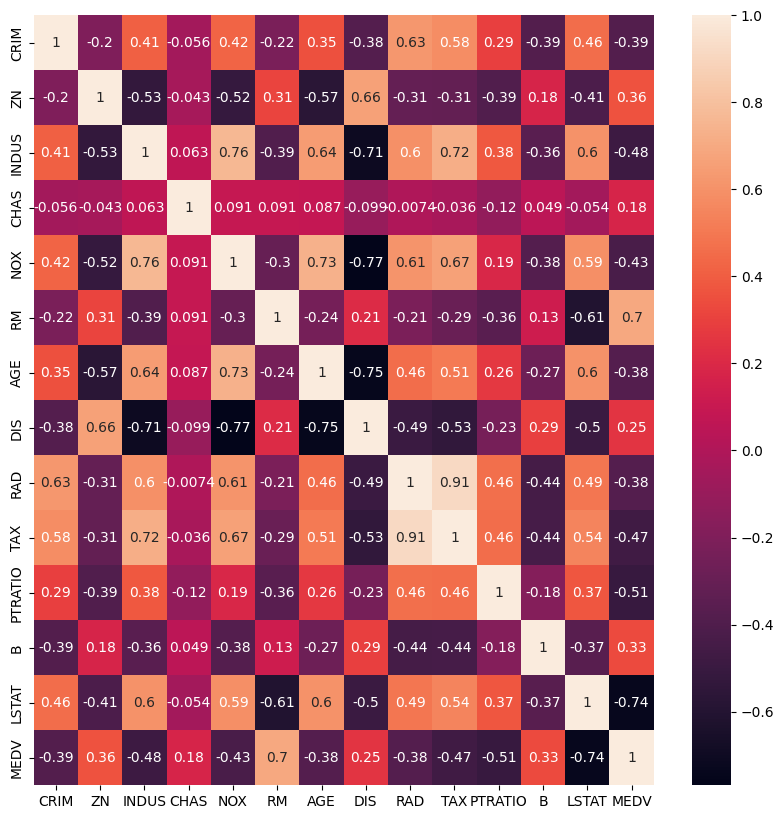

In [4]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot = True)

In [5]:
prices = dataset['MEDV']
# Exclusão das caracteristicas com alta correlação
dataset.drop(['INDUS','NOX','AGE','RAD'], axis = 1, inplace=True)
features = dataset.drop('MEDV', axis = 1)
dataset.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33,36.2


In [6]:
features.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33


In [7]:
prices.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
# Split-out validation dataset
seed = 7
test_size = 0.30

X = features.values
y = prices.values

In [9]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [10]:
qtd_features = len(X[0,:]) #X.shape[1]
qtd_features

9

In [11]:
qtd_amostras = len(X[:,0])
qtd_amostras

506

In [12]:
X_train.shape

(354, 9)

In [ ]:
y

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=qtd_features, activation='relu'))
model.add(Dense(10, activation='relu'))
#Adiciona uma camada de saída sem função de ativação fazendo a apenas a multiplicação das caracteristicas x pesos
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Usa a função de perda mse (mean square error) e monitora o mae (mean absolute erro) e mse (mean square error)
model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mape'])

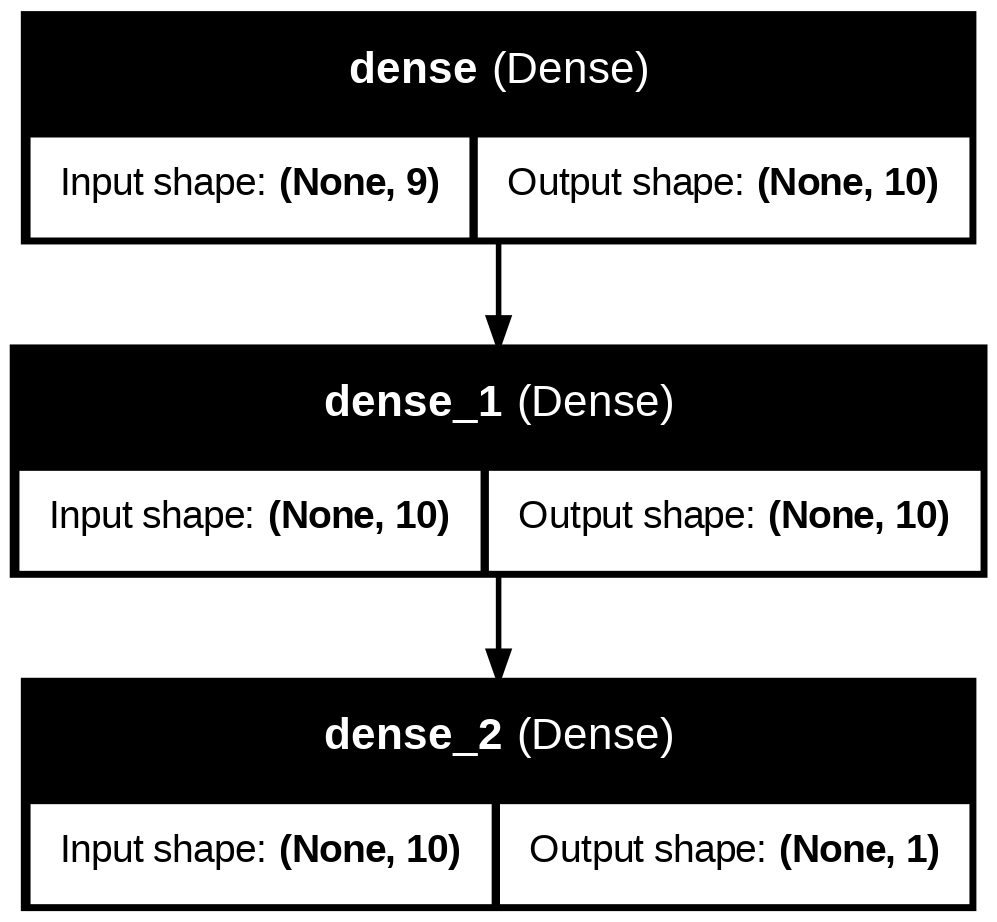

In [16]:
plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)

In [17]:
model.fit(X_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 576.2492 - mae: 22.1491 - mape: 98.4228
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 574.3672 - mae: 21.7924 - mape: 94.3551
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 496.9222 - mae: 19.9705 - mape: 83.3681
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 340.0634 - mae: 15.8328 - mape: 64.8498
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.0948 - mae: 10.0244 - mape: 42.4524
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.5328 - mae: 7.6818 - mape: 36.3360
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.7013 - mae: 7.1032 - mape: 38.9672
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.1764 - mae: 6.9643 - mape: 35.8851
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.3070 - mae: 6.9092 - mape: 35.2554
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.4587 - mae: 6.1322 - mape: 33.1257
Epoch 11/50
71/71 ━━━━━━━━━

In [ ]:
X_test

In [18]:
y_pred = model.predict(X_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[25.829319 ],
       [20.836374 ],
       [20.712894 ],
       [21.699669 ],
       [ 6.236332 ],
       [14.049474 ],
       [18.722406 ],
       [27.002876 ],
       [29.412077 ],
       [10.524966 ],
       [10.970865 ],
       [30.142397 ],
       [18.441801 ],
       [19.599491 ],
       [35.736393 ],
       [20.019554 ],
       [27.47663  ],
       [31.384127 ],
       [11.586757 ],
       [23.96601  ],
       [18.492023 ],
       [28.554062 ],
       [36.811966 ],
       [16.397543 ],
       [11.550233 ],
       [10.282684 ],
       [32.372696 ],
       [27.179525 ],
       [24.69415  ],
       [26.37248  ],
       [18.700924 ],
       [31.05344  ],
       [30.573507 ],
       [12.04275  ],
       [37.189354 ],
       [18.780952 ],
       [19.60011  ],
       [11.724643 ],
       [22.069944 ],
       [27.058687 ],
       [26.20495  ],
       [16.092028 ],
       [15.916012 ],
       [25.99824  ],
       [18.605215 ],
       [10.494708 ],
       [25.441072 ],
       [19.61

In [19]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

3.3510424074373746
26.5177500137089
5.149538815632804


In [20]:
dfresult = pd.DataFrame({
        "Preço Original": y_test,
        "Preço Predito": y_pred[:,0]
    })

In [21]:
dfresult.head(20)

,Preço Original,Preço Predito
0,21.7,25.829319
1,18.5,20.836374
2,22.2,20.712894
3,20.4,21.699669
4,8.8,6.236332
5,8.3,14.049474
6,21.4,18.722406
7,23.6,27.002876
8,23.5,29.412077
9,19.0,10.524966


<Axes: >

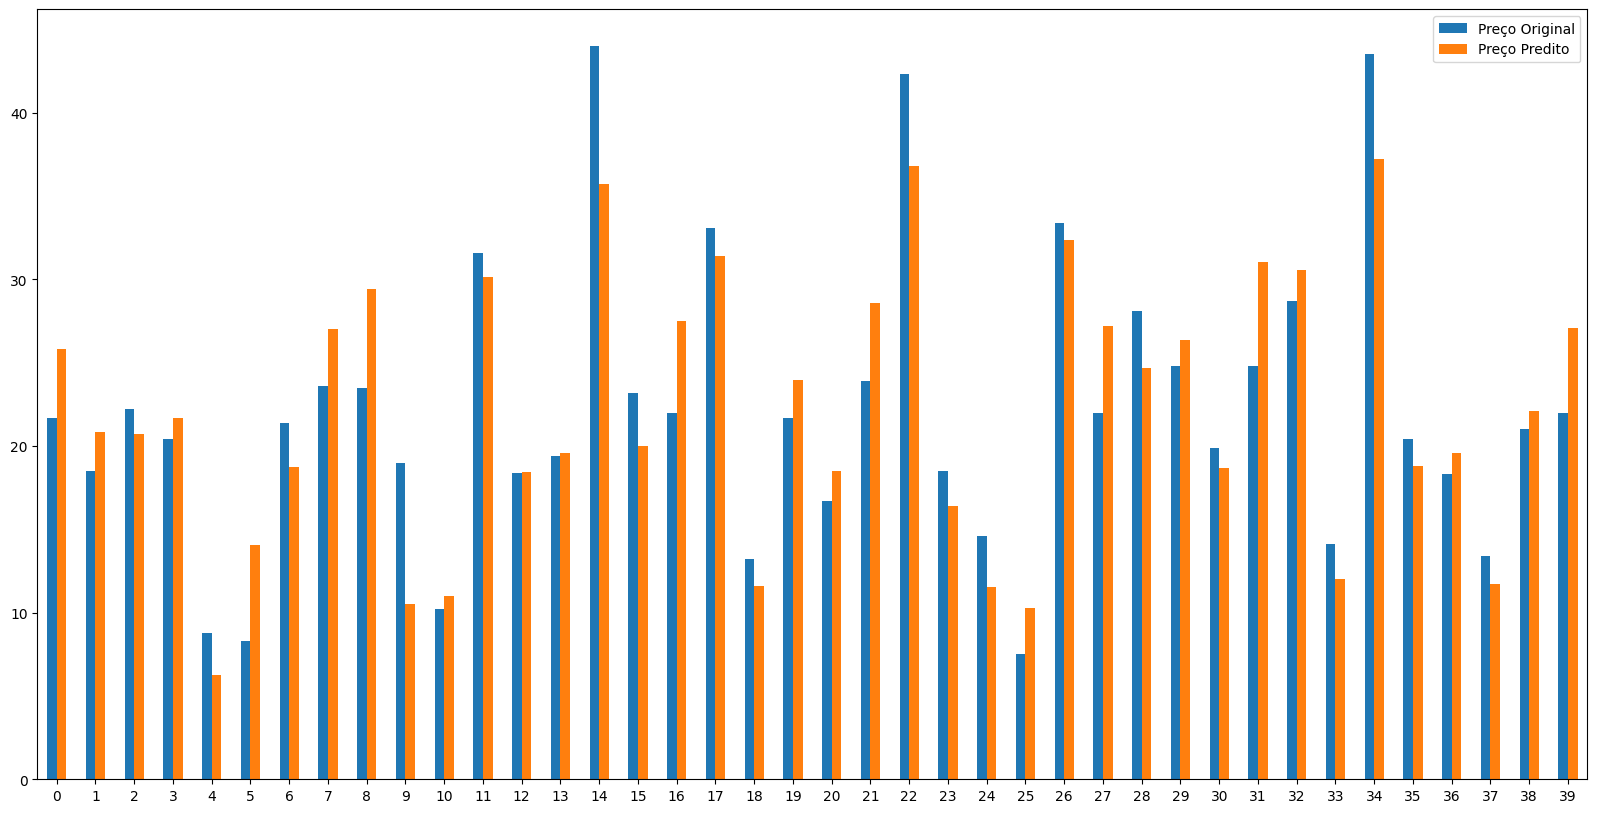

In [22]:
dfresult.head(40).plot.bar(rot=0, figsize = (20,10))